In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../dataset/2019-Dec.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [5]:
# na null check
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [14]:
print('전체 user : {} 명'.format(df['user_id'].nunique()))
user_session_cnt = df.groupby('user_id')['user_session'].nunique().reset_index(name='session_cnt')
user_session_cnt['session_cnt'].describe()

전체 user : 370154 명


count    370154.000000
mean          2.268961
std          11.778683
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        5366.000000
Name: session_cnt, dtype: float64

In [17]:
# User who generated the most number of sessions
user_session_cnt[user_session_cnt['session_cnt'] == user_session_cnt['session_cnt'].max()]

,user_id,session_cnt
78170,527021202,5366


In [19]:
df.loc[df['user_id']==527021202]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date
31413,2019-12-01 10:06:05+00:00,cart,5908242,1487580007675986893,NaN,NaN,1.43,527021202,48a088e0-dafc-4029-87cb-64e0ada013e3,2019-12-01
31416,2019-12-01 10:06:07+00:00,cart,5908241,1487580007675986893,NaN,NaN,1.43,527021202,48a088e0-dafc-4029-87cb-64e0ada013e3,2019-12-01
31421,2019-12-01 10:06:09+00:00,cart,5908238,1487580007675986893,NaN,NaN,1.43,527021202,48a088e0-dafc-4029-87cb-64e0ada013e3,2019-12-01
31423,2019-12-01 10:06:10+00:00,cart,5908234,1487580007675986893,NaN,NaN,1.43,527021202,48a088e0-dafc-4029-87cb-64e0ada013e3,2019-12-01
31424,2019-12-01 10:06:12+00:00,cart,5908237,1487580007675986893,NaN,NaN,1.43,527021202,48a088e0-dafc-4029-87cb-64e0ada013e3,2019-12-01
...,...,...,...,...,...,...,...,...,...,...
3156582,2019-12-26 13:23:33+00:00,remove_from_cart,5911236,1487580007675986893,NaN,dartnails,1.43,527021202,594bd193-6326-49a7-b464-e15fb03ecbb9,2019-12-26
3156587,2019-12-26 13:23:35+00:00,remove_from_cart,5911853,1487580007675986893,NaN,dartnails,1.27,527021202,594bd193-6326-49a7-b464-e15fb03ecbb9,2019-12-26
3156588,2019-12-26 13:23:35+00:00,remove_from_cart,5911864,1487580007675986893,NaN,dartnails,1.27,527021202,594bd193-6326-49a7-b464-e15fb03ecbb9,2019-12-26
3156590,2019-12-26 13:23:36+00:00,remove_from_cart,5911857,1487580007675986893,NaN,dartnails,1.27,527021202,594bd193-6326-49a7-b464-e15fb03ecbb9,2019-12-26


In [21]:
df.loc[df['user_id']==527021202,'date'].value_counts().sort_index()

date
2019-12-01    1127
2019-12-02     945
2019-12-03     201
2019-12-04      45
2019-12-05       1
2019-12-06      96
2019-12-07    2085
2019-12-08     189
2019-12-09     341
2019-12-10       2
2019-12-11     293
2019-12-12      34
2019-12-13    1721
2019-12-14     862
2019-12-15      12
2019-12-16     127
2019-12-18     129
2019-12-19      97
2019-12-20     106
2019-12-21      11
2019-12-23      80
2019-12-24      65
2019-12-26     120
Name: count, dtype: int64

In [ ]:
## 데이터 샘플로 뽑아서 분석 진행 (생략)
# df_sample =df.sample(n=50000, random_state=111)
# print(df_sample)

In [8]:
##Event가 무엇이 있는지?
##퍼널이 닫혀있는 가정 
pd.concat([df.event_type.value_counts(), df.event_type.value_counts(normalize=True)],axis=1)

,count,proportion
event_type,,
view,1728331,0.489157
cart,927124,0.262397
remove_from_cart,664655,0.188112
purchase,213176,0.060334


In [9]:
## 퍼널에 대한 비교도 보고싶고
## Event별 제품이 다를까~?
## 제품을 다량으로 구매하는 경우, 단품으로 구매하는 경우 -> 제품을 구매하는 어떤 범위가 어느정도인가?
## 어떤 제품들끼리 잘 묶여서 구매가 되고 있는건가?!
## 우리가 추천할 영역의 값이 무엇을 기준으로 해야 하나? -> product_id 것을 추천
## product_id가 얼마나 영역의 커버리지할 수 있는 범위 
## 추천시스템을 구현할 때
## 개인화추천시스템 -> 그전에 이미 단순하게도 충분히 구현할 수 있고, 꼭 개인화가 아니더라도 이벤트에 따라서 또는 실제 단순한 로직으로도 매출에 대해서 영향을 줄 수 있다.
## 단순한 로직으로 추천
## 가장 많이 구매한 것, 가장 같이 잘 팔리는 것 (동시구매 co-occurence), event 별 추천, 제품 또는 검색어 기반으로 추천도 달라질 수 있다.


## 가설 1 . Event별 제품의 베스트가 차이가 클까?

top_viewed=df[df['event_type']=='view']['product_id'].value_counts().head(5)
top_carted=df[df['event_type']=='cart']['product_id'].value_counts().head(5)
top_purchased=df[df['event_type']=='purchase']['product_id'].value_counts().head(5)

In [10]:
print('top_viewed',top_viewed)
print('top_carted',top_carted)
print('top_purchased',top_purchased)

top_viewed product_id
5809910    24419
5909810     8473
5877454     6621
5809912     5944
5886282     5488
Name: count, dtype: int64
top_carted product_id
5809910    6513
5802432    5081
5700037    4978
5854897    4078
5815662    3047
Name: count, dtype: int64
top_purchased product_id
5809910    1659
5854897     786
5802432     714
5700037     621
5809912     620
Name: count, dtype: int64


In [11]:
## 퍼널에 대한 확인

# 시계열로 변환 
df['event_time'] = pd.to_datetime(df['event_time'])

## event_time 일자로 뽑으려면
df['date']=df['event_time'].dt.date

## 우리가 지금 퍼널을 카운팅하기 하기 위해서는 어떤 기준으로 가야할까?
## user_id 카운팅
daily_funnel_cohort=df.groupby(['date','event_type'])['user_id'].nunique().unstack(fill_value=0)
## cohort 컬럼 정리
daily_funnel_cohort=daily_funnel_cohort[['view','cart','purchase']]

## 전환율 계산 
daily_funnel_cohort['view->cart(%)'] = (daily_funnel_cohort['cart']/daily_funnel_cohort['view']*100).round(2)
daily_funnel_cohort['cart->purchase(%)'] = (daily_funnel_cohort['purchase']/daily_funnel_cohort['cart']*100).round(2)
daily_funnel_cohort['view->purchase(%)'] = (daily_funnel_cohort['purchase']/daily_funnel_cohort['view']*100).round(2)


In [12]:
daily_funnel_cohort

event_type,view,cart,purchase,view->cart(%),cart->purchase(%),view->purchase(%)
date,,,,,,
2019-12-01,16662,4164,825,24.99,19.81,4.95
2019-12-02,18434,4618,1014,25.05,21.96,5.50
2019-12-03,17888,4449,981,24.87,22.05,5.48
2019-12-04,17926,4720,1039,26.33,22.01,5.80
2019-12-05,17285,4407,964,25.50,21.87,5.58
2019-12-06,16093,4152,924,25.80,22.25,5.74
2019-12-07,14812,3678,747,24.83,20.31,5.04
2019-12-08,16043,4210,842,26.24,20.00,5.25
2019-12-09,18739,5228,1119,27.90,21.40,5.97


Text(0, 0.5, 'conversion_rate')

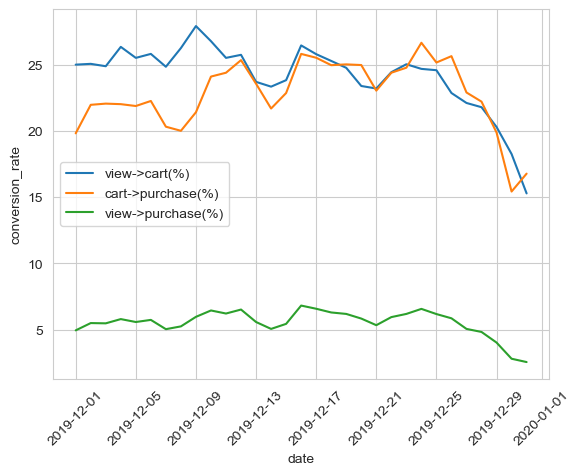

In [24]:
sns.lineplot(data= daily_funnel_cohort, x=daily_funnel_cohort.index, y= 'view->cart(%)', label= 'view->cart(%)')
sns.lineplot(data= daily_funnel_cohort, x=daily_funnel_cohort.index, y= 'cart->purchase(%)', label = 'cart->purchase(%)')
sns.lineplot(data= daily_funnel_cohort, x=daily_funnel_cohort.index, y= 'view->purchase(%)', label= 'view->purchase(%)')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('conversion_rate')

In [13]:
df.groupby(['date','event_type'])['user_id'].nunique().unstack(fill_value=0)

event_type,cart,purchase,remove_from_cart,view
date,,,,
2019-12-01,4164,825,2472,16662
2019-12-02,4618,1014,2669,18434
2019-12-03,4449,981,2601,17888
2019-12-04,4720,1039,2657,17926
2019-12-05,4407,964,2511,17285
2019-12-06,4152,924,2328,16093
2019-12-07,3678,747,2080,14812
2019-12-08,4210,842,2395,16043
2019-12-09,5228,1119,3044,18739
